### Given two list of x and y coordinates, and a list of errors on y, find the parabola that minimizes the sum of square distances between the parabola and the (x,y) points.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import *

In [4]:
xx, yy, aa, bb, cc = symbols('xx yy aa bb cc')

In [5]:
xdataor = np.array([0,70,75,80,85,90,95,100,105,110,115,120])
npoint = len(xdataor)
npoint
ax,bx = float(xdataor[0]),float(xdataor[npoint-1])
apx,bpx = 2./(bx-ax),(bx + ax)/(bx - ax)
print(ax)
print(bx)
print(apx)
print(bpx)
xdata = xdataor*apx - bpx
xdata
xdata=xdataor

0.0
120.0
0.016666666666666666
1.0


In [6]:
ydata = np.array([0.146,0.172,0.174,0.177,0.184,0.186,0.192,0.197,0.202,0.206,0.211,0.217])
yerr = np.array([0.001,0.001,
0.001,
0.001,
0.001,
0.001,
0.001,
0.001,
0.001,
0.001,
0.001,
0.001])
if (len(xdata)!=len(ydata)): print ("dimensioni vettori disuguali")
if (len(yerr)!=len(ydata)) : print ("dimensioni vettori disuguali")

We want to find the parameters $a$ and $b$ of the parabola $y = c x^2 + b x + a$ which minimize:
$ \chi^2 = \sum_i \frac{(y_i - c x_i^2 - b x_i - a)^2}{\sigma_i^2}$

The minimum condition can be derived expanding $(yy - cc \cdot xx^2 - bb \cdot xx - aa)^2$, and equating the derivatives with respect to $aa$, $bb$, $cc$ to zero. 

In [7]:
s = expand((yy - cc*xx**2 - bb*xx - aa)**2)
s

aa**2 + 2*aa*bb*xx + 2*aa*cc*xx**2 - 2*aa*yy + bb**2*xx**2 + 2*bb*cc*xx**3 - 2*bb*xx*yy + cc**2*xx**4 - 2*cc*xx**2*yy + yy**2

In [8]:
s_aa = diff(s,aa)
s_aa

2*aa + 2*bb*xx + 2*cc*xx**2 - 2*yy

In [9]:
s_bb = diff(s,bb)
s_bb

2*aa*xx + 2*bb*xx**2 + 2*cc*xx**3 - 2*xx*yy

In [10]:
s_cc = diff(s,cc)
s_cc

2*aa*xx**2 + 2*bb*xx**3 + 2*cc*xx**4 - 2*xx**2*yy

$a$, $b$ and $c$ are the solutions of the linear system:
$\begin{bmatrix}
\sum_i \frac{1}{\sigma_i^2} & \sum_i \frac{x_i}{\sigma_i^2} & \sum_i \frac{x_i^2}{\sigma_i^2}\\
\sum_i \frac{x_i}{\sigma_i^2} & \sum_i \frac{x_i^2}{\sigma_i^2} & \sum_i \frac{x_i^3}{\sigma_i^2}\\
\sum_i \frac{x_i^2}{\sigma_i^2} & \sum_i \frac{x_i^3}{\sigma_i^2} & \sum_i \frac{x_i^4}{\sigma_i^2}\\
\end{bmatrix}$
$\begin{bmatrix} a\\b\\c \end{bmatrix}$ = 
$\begin{bmatrix} 
\sum_i \frac{y_i}{\sigma_i^2} \\ \sum_i \frac{x_i y_i}{\sigma_i^2}\\\sum_i \frac{x_i^2 y_i}{\sigma_i^2}
\end{bmatrix}$

In forma matriciale : DA = B quindi A = D^(-1)B

In [11]:
yerrSq = yerr*yerr
sum_one_over_yerrSq = (1./yerrSq).sum()
sum_x_over_yerrSq = (xdata/yerrSq).sum()
sum_x2_over_yerrSq = (xdata*xdata/yerrSq).sum()
sum_x3_over_yerrSq = (xdata*xdata*xdata/yerrSq).sum()
sum_x4_over_yerrSq = (xdata*xdata*xdata*xdata/yerrSq).sum()
sum_y_over_yerrSq = (ydata/yerrSq).sum()
sum_xy_over_yerrSq = (xdata*ydata/yerrSq).sum()
sum_x2y_over_yerrSq = (xdata*xdata*ydata/yerrSq).sum()

In [12]:
matD = np.array([[sum_one_over_yerrSq,sum_x_over_yerrSq,sum_x2_over_yerrSq],
                [sum_x_over_yerrSq,sum_x2_over_yerrSq,sum_x3_over_yerrSq],
                [sum_x2_over_yerrSq,sum_x3_over_yerrSq,sum_x4_over_yerrSq]])
matD_inv = np.linalg.inv(matD)
matD
matD_inv

array([[ 9.93241583e-07, -2.12460064e-08,  1.10592283e-10],
       [-2.12460064e-08,  8.93265414e-10, -6.65043157e-12],
       [ 1.10592283e-10, -6.65043157e-12,  5.51099593e-14]])

Check D^(-1)D = I

In [13]:
np.dot(matD,matD_inv)

array([[ 1.00000000e+00, -1.11022302e-16,  8.67361738e-19],
       [ 0.00000000e+00,  1.00000000e+00,  1.11022302e-16],
       [-1.45519152e-11,  0.00000000e+00,  1.00000000e+00]])

In [14]:
matB = np.array([sum_y_over_yerrSq,sum_xy_over_yerrSq,sum_x2y_over_yerrSq])
matB

array([2.2640000e+06, 2.0374500e+08, 2.0128075e+10])

In [15]:
np.dot(matD_inv,matB)

array([1.45941140e-01, 3.70178809e-05, 4.64614193e-06])

In [16]:
a, b, c = np.dot(matD_inv,matB)[0],np.dot(matD_inv,matB)[1],np.dot(matD_inv,matB)[2]
print (" a = ", a)
print (" b = ", b)
print (" c = ", c)

 a =  0.14594114032931405
 b =  3.701788094762071e-05
 c =  4.646141930486972e-06


Calcolo varianze ed errori sui parametri (Attenzione a cifre significative e unita' di misura!!)

In [17]:
vara, varb, varc= matD_inv[0,0], matD_inv[1,1], matD_inv[2,2]
erra=np.sqrt(vara)
errb=np.sqrt(varb)
errc=np.sqrt(varc)
print (" errore su a = ",erra)
print (" errore su b = ",errb)
print (" errore su c = ",errc)

 errore su a =  0.0009966150624481107
 errore su b =  2.9887546136010995e-05
 errore su c =  2.3475510487168065e-07


Plot, adding extra points for the parabola.

<ErrorbarContainer object of 3 artists>

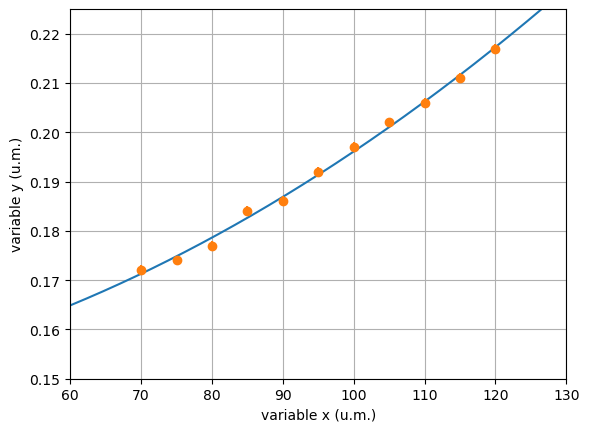

In [18]:
fig, ax = plt.subplots()
thickxdata = np.arange(60.,130.,0.001)
ax.set_xlabel('variable x (u.m.)')
ax.set_ylabel('variable y (u.m.)')
ax.grid()
ax.set_ylim(0.15, 0.225); ax.set_xlim(60, 130) #PEr cambiare range plot
plt.plot(thickxdata,c*thickxdata*thickxdata+b*thickxdata+a)
plt.errorbar(xdata,ydata,yerr=yerr,fmt='o')

In [19]:
scarto1 = (ydata-a-b*xdata-c*xdata*xdata)/yerr
scarto2 = (ydata-a-b*xdata-c*xdata*xdata)
chi2 = (scarto1*scarto1).sum()
errstSq = (scarto2*scarto2/(npoint-3)).sum()
errst = np.sqrt(errstSq)
print (" Chi^2 = ",chi2)
print (" errore standard della stima = ",errst)

 Chi^2 =  9.156903267127
 errore standard della stima =  0.0010086791840557851


In [20]:
sum_y = (ydata).sum()
ymean=sum_y/npoint
ameany = ydata-ymean
vary = (ameany*ameany).sum()
yatteso =a+b*xdata+c*xdata*xdata
scarto3=yatteso-ymean
var_numeratore=(scarto3*scarto3).sum()
detercoeff2=var_numeratore/vary
detercoeff=np.sqrt(detercoeff2)
print ("coefficiente determinazione = ",detercoeff)

coefficiente determinazione =  0.9989441756460339
